# BRFSS Data evaluation

## Obesity total

Query:  
- LocationDesc: National  
- Class: Obesity / Weight Status  
- Total: Total  

In [4]:
import os
import sqlalchemy
import pandas as pd
from pathlib import Path
import numpy as np 
import matplotlib as mpl
import seaborn as sns
import matplotlib.ticker as mtick
#print(os.getcwd())

In [2]:
# Connect to the database using SQLAlchemy

# sqlite://<nohostname>/<path>
# where <path> is relative:
dbEngine=sqlalchemy.create_engine('sqlite:///../../data/brfss.sqlite')
# with dbEngine.connect() as conn:
#     brfss = pd.read_sql('select * from brfss',conn)
with dbEngine.connect() as conn:
    sqlstatement_obese = "select YearStart, YearEnd, LocationAbbr, LocationDesc, Class, Question, Data_Value, Data_Value_Alt, Data_Value_Footnote, Low_Confidence_Limit, 'High_Confidence_Limit ', Sample_Size from brfss where LocationDesc = 'National' and Class = 'Obesity / Weight Status' and Total = 'Total' and Question like '%aged 18 years and older who have obesity' order by YearStart"
    brfss_obesity = pd.read_sql_query(sqlstatement_obese, conn)
    brfss_obesity = brfss_obesity.set_index('YearStart')
    brfss_obesity['Data_Value'] = brfss_obesity['Data_Value'].astype("float")
    
#print(brfss_obesity)


c:\Users\Agnes\anaconda3\envs\MADE_PROJECT\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Agnes\anaconda3\envs\MADE_PROJECT\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Agnes\AppData\Local\Temp\ipykernel_18904\3570757428.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_value)


[Text(0, 27.0, '27.00%'),
 Text(0, 28.0, '28.00%'),
 Text(0, 29.0, '29.00%'),
 Text(0, 30.0, '30.00%'),
 Text(0, 31.0, '31.00%'),
 Text(0, 32.0, '32.00%'),
 Text(0, 33.0, '33.00%'),
 Text(0, 34.0, '34.00%')]

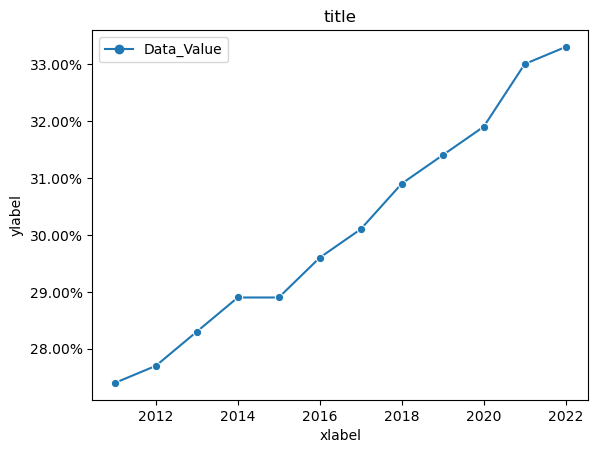

In [5]:
#brfss_obesity.plot(y='Data_Value')

df = pd.DataFrame(brfss_obesity, columns=['Data_Value'])
ax = sns.lineplot(data=df, markers = True)
ax.set(xlabel='xlabel', ylabel='ylabel', title='title')
y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

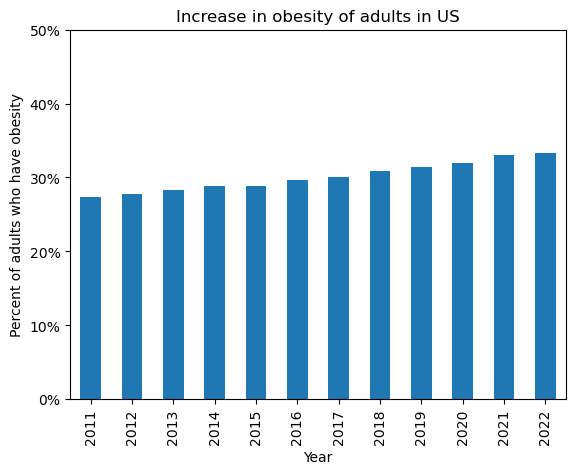

In [8]:
ax = brfss_obesity['Data_Value'].plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim([0,50])
ax.set(xlabel='Year', ylabel='Percent of adults who have obesity', title='Increase in obesity of adults in US');